# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 26th, 2023 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/

The assignment should be handed in as a group. To do this, all group members must register for peergrade individually. See how to hand in as a group here: https://help.peergrade.io/en/articles/69783-how-to-submit-as-a-group .

(If you haven't set up an account on peergrade yet, go to www.peergrade.io/join and type in the class code: ***DPZEV6***.)

# Part 1: Binning degree distributions


* Binning real numbers
  * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
  * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
  * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
* Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.
  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
* Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
  * Now, use `networkx` to create the graph and extract the degree distribution.
  * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

## Answer Part 1

#### Binning real numbers

In [2]:
random.seed(42)
data_points = [random.gauss(2, 0.125) for _ in range(5000)]

counts, bins = np.histogram(data_points)

print(f'length of counts: {len(counts)}')
print(f'length of bins: {len(bins)}')

length of counts: 10
length of bins: 11


> The np.hisogram() function returns two arrays.
>
> One of the arrays contains the bin edges. This specifies values where the bar starts and ends on the first axis.
> The other array is the counts. This is the number of elements that lie in the bined range. This is the height of the histogram bars.
>
>There are always more elements i the bins array, since 1 bar always have two edges. Multiple bars will share edges but since there is a start edge for the first bar and an end edge for the last bar, which aren't shared, the bins array will always be 1 longer. 

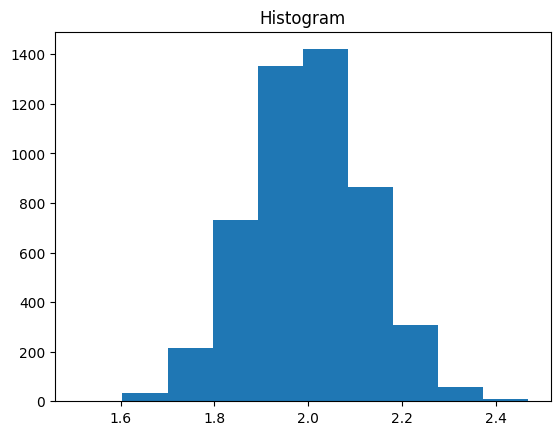

In [3]:
plt.title('Histogram')
plt.bar(bins[:-1], counts, width=np.diff(bins), align='edge')
plt.show()

> The last edge is excluded in order to account for the different lengths in the two arrays. This last edge is not needed because the width of the bins dictate where the bin ends. bins[:-1] simply excludes the last bin edge.

#### Binning intergers

In [4]:
np.random.seed(42)
poisson_data_points = np.random.poisson(10, 5000)
min_value = np.min(poisson_data_points)
max_value = np.max(poisson_data_points)
print(f'min value: {min_value}')
print(f'max value: {max_value}')

v = np.arange(min_value, max_value + 2)
print(f'min v: {np.min(v)}')
print(f'max v: {np.max(v)}')

counts_poisson, bins_poisson = np.histogram(poisson_data_points, bins=v)

bin_count_sum = np.sum(counts_poisson)
print(f'bin count sum: {bin_count_sum}')

min value: 1
max value: 24
min v: 1
max v: 25
bin count sum: 5000


> The minimum value of the generated data is 1 and the maximum value is 24.
>The first entry of v should be the minimum value of the generated datapoint, 0, but the last entry should be the maximum value plus 1, 25. This is because the counts are generated such that the start edge is include and the end egde is excluded and included in the next count. Thus the last entry of v is the maximum value plus 1 and the last count will be for the maximum value.
> This means that there won't be a bin for values that are smaller than the minimum value and larger than the maximum value, since these values do not occur in the data.

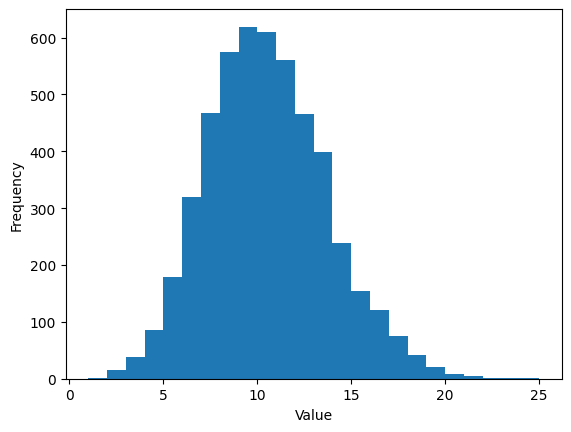

In [5]:
plt.bar(bins_poisson[:-1], counts_poisson, width=1.0, align='edge')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

#### Binning and plotting degree distributions

In [6]:
N = 5000
avg_k = 10

p = avg_k / (N - 1)
print(f'p: {p}')

p: 0.002000400080016003


In [7]:
np.random.seed(43)
random.seed(43)

er_graph = nx.erdos_renyi_graph(N, p)


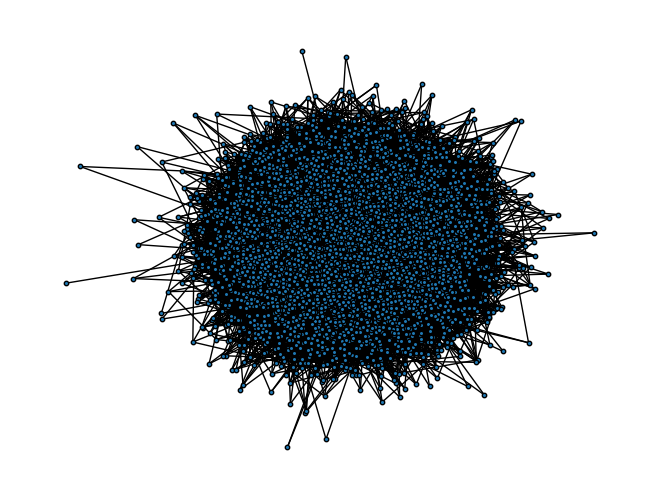

In [8]:
nx.draw(er_graph, with_labels=False, node_size=10, edge_color='#000000',edgecolors='#000000')
plt.show()

> Above, the Erdös-Renyi random network, with $p=\frac{\langle k\rangle}{N-1}=0.002$ is drawn.

In [9]:
degree_list = [d for n, d in er_graph.degree()]
min_value_er = min(degree_list)
max_value_er = max(degree_list)
print(f'min degree: {min_value_er}')
print(f'max degree: {max_value_er}')

min degree: 1
max degree: 24


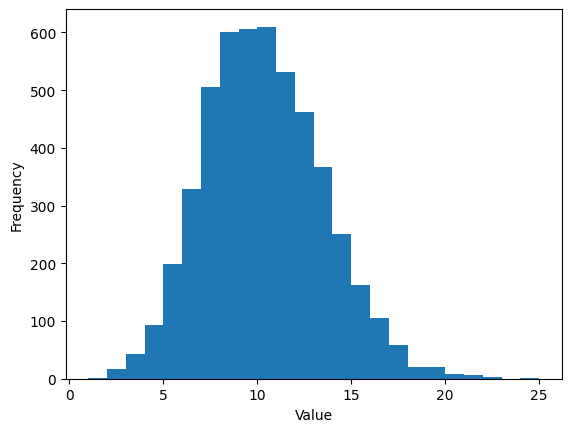

In [10]:
counts_er, bins_er = np.histogram(degree_list, bins=range(min_value_er, max_value_er +2))

plt.bar(bins_er[:-1], counts_er, width=1.0, align='edge')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

> Above, is a histogram of the degrees and it looks very similar to the histogram of the Poisson distribution.

# Part 2: Random networks and plotting in `networkx`
 
* In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)
  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
  * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

## Answer Part 2

### exercise 3.1 ('Erdős-Rényi Networks')
We consider a Erdos-Renyi network with $N=3000$ nodes and link probability $p=10^{-3}$.
#### a) What is the expected number of links, 〈L〉?
> Using eq. 3.2 the expected number of links is 
> $$\langle L\rangle=p\frac{N(N-1)}{2}=4498.5$$

In [11]:
N = 3000
p = 1e-3
L = p*N*(N-1)/2
print('Expected number of links: ', L)

Expected number of links:  4498.5


#### b) In which regime is the network?

>Using eq. 3.3 the average degree is
>$$\langle k\rangle=\frac{2L}{N}=2.999$$
>
> Since the average degree is larger than 1, the network is in the supercritical regime.
> It is not connected regime because the average degree is smaller than $\ln(N)=8$.

In [12]:
avg_k = 2*L/N
print('Average degree: ', avg_k)
print(f'1 < {avg_k} < {np.log(N)}')

Average degree:  2.999
1 < 2.999 < 8.006367567650246


#### c) Calculate the probability $p_c$ so that the network is at the critical point
> The network is at the critical point when 
> $$p_{c}=\frac{1}{N}=3.33\cdot 10^{-4}$$

In [13]:
p_c = 1/N
print(f'p_c = {p_c}')


p_c = 0.0003333333333333333


#### d) Given the linking probability $p = 10^{–3}$, calculate the number of nodes $N^{cr}$ so that the network has only one component.

> The network has only one component when it is in the connected regime $\langle k\rangle>\ln(N)$.
> The result is obtained numerically and we see that the network has only one component when $N^{cr}=9119.13$.

In [14]:
Ns = np.linspace(N,10000,100000000)
avg_ks = p*(Ns-1)
arg = np.where(avg_ks > np.log(Ns))[0][0]
N_cr = Ns[arg]
print(N_cr)

9119.129651191295


#### e) For the network in (d), calculate the average degree $〈k^{cr}〉$ and the average distance between two randomly chosen nodes $〈d〉$

> The average degree of the network is also obtained numerically 
>$$\langle k\rangle^{cr}=9.12$$
> The average distance is given by eq. 3.19
> $$\langle d\rangle=\frac{\ln(N)}{\ln(\langle k\rangle)}=4.13$$

In [15]:
avg_k_cr = avg_ks[arg]
print(f'average degree at critical point: {avg_k_cr}')
avg_d = np.log(N_cr)/np.log(avg_k_cr)
print(f'average distance at critical point: {avg_d}')

average degree at critical point: 9.118129651191296
average distance at critical point: 4.125356407140234


#### f) Calculate the degree distribution $p_k$ of this network (approximate with a Poisson degree distribution).
> The degree distribution can be approximated with a Poisson degree distribution eq. 3.8
>$$
>p_{k} = \exp(-\langle k_{cr}\rangle)\frac{\langle k_{cr}\rangle^{k}}{k!} = \exp(-9.12)\frac{9.12^{k}}{k!}=1.1\cdot 10^{-4}\frac{9.12^{k}}{k!}
>$$

#### A random network with 200 nodes and an average degree of 1.5

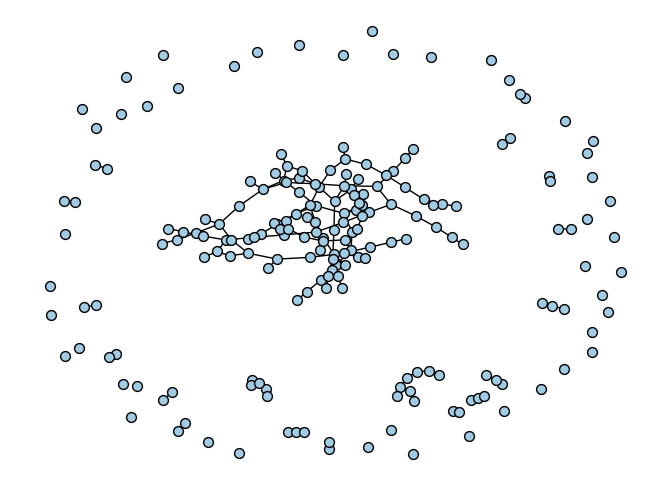

In [16]:
np.random.seed(42)
random.seed(42)
N = 200
avg_k = 1.5
p = avg_k/(N-1)
G = nx.erdos_renyi_graph(N,p)
nx.draw(G, with_labels=False, node_size=50, node_color='#A0CBE2', edge_color='#000000',edgecolors='#000000')
plt.show()

### Extract the Giant Connected Component, GCC

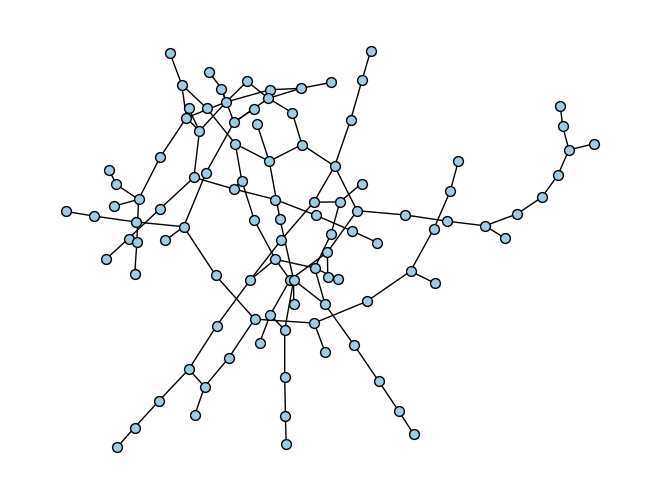

In [17]:
# plot the biggets component
G_connected = list(G.subgraph(c) for c in nx.connected_components(G))
G_giant = G_connected[0]
for subgraph in G_connected:
    if len(subgraph) > len(G_giant):
        G_giant = subgraph
    
nx.draw(G_giant, with_labels=False, node_size=50, node_color='#A0CBE2', edge_color='#000000',edgecolors='#000000')
plt.show()

> The graph above shows the biggest component in the random graph.

#### Choose a node at random from the GCC 

In [18]:
random.seed(42)
random_node = random.choice(list(G_giant.nodes()))
print(f'random node: {random_node}')

random node: 155


#### Find all nodes that are precisely 2 steps away from that node

In [19]:
nodes_2 = nx.single_source_shortest_path_length(G_giant, random_node, 2)
print(f'nodes 2: {nodes_2}')

nodes 2: {155: 0, 82: 1, 144: 1, 92: 2, 160: 2, 156: 2, 163: 2}


#### Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`)

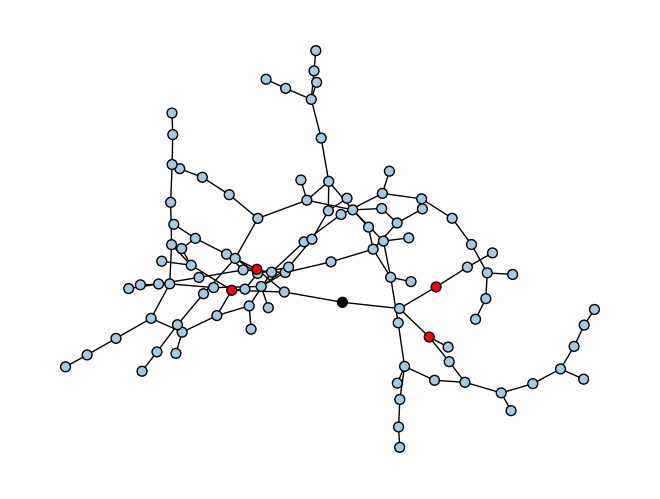

In [20]:
color_map = []
for node in G_giant:
    if node == random_node:
        color_map.append('#000000')
    elif node in nodes_2 and nodes_2[node] == 2:
        color_map.append('#ff0000')
    else: 
        color_map.append('#A0CBE2') 
        
nx.draw(G_giant, with_labels=False, node_size=50, node_color=color_map, edge_color='#000000',edgecolors='#000000')
plt.show()

> From node 155 marked as black, there are four nodes with the exact distance of two marked in red. 

# Part 3: Watts-Strogatz Networks

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.
* Let's understand the behavior of the WS model as we increase _p_ in more detail.. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).


![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ws.png)

## Answer Part 3

#### Generating three Watts-Strogatz graphs
> We generate 3 graphs, each graphs has 500 nodes, an average degree of 4 but have different rewiring probabilities.

In [21]:
random.seed(42)
np.random.seed(42)
ws1 = nx.watts_strogatz_graph(500, 4, 0)
ws2 = nx.watts_strogatz_graph(500, 4, 0.1)
ws3 = nx.watts_strogatz_graph(500, 4, 1)

In [22]:
graphs = [ws1, ws2, ws3]

print("Average shortest paths:")
for i in graphs:
    avg_shortest_path = nx.average_shortest_path_length(i)
    print(avg_shortest_path)

Average shortest paths:


62.875751503006015
7.877138276553106
4.765338677354709


> When the probability of rewiring increases towards 1, the network will transition from being a "ring lattice" to becoming completly random. This is because all of the links will be rewired with a 100% chance. It is possible that the rewiring will result in the same link as before, i.e connect to the immediate neighbor, but as the number of nodes is $N=500$ the probablity of this happening is $\frac{1}{500}$. 
>
> Consequently, the distance between nodes will decrease significantly as the network moves away from being a ring lattice. 

#### Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. 

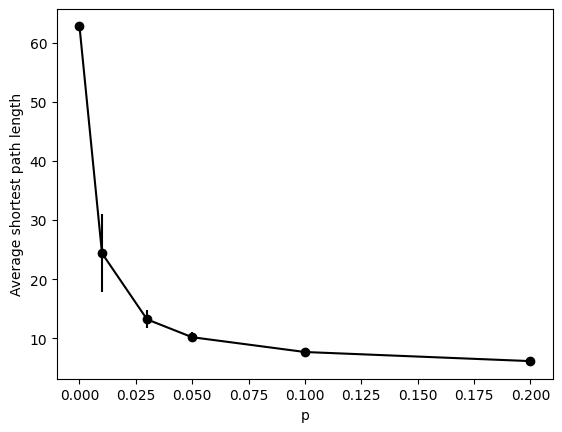

In [23]:
random.seed(42)
np.random.seed(42)

ps = np.array([0,0.01,0.03,0.05,0.1,0.2])
N = 500
avg_k = 4
avg_d = np.zeros_like(ps)
std_d = np.zeros_like(ps)

num = 50
for i, p in enumerate(ps):
    d = np.zeros(num)
    for j in range(num):
        G = nx.watts_strogatz_graph(N, avg_k, p)
        d[j] = nx.average_shortest_path_length(G)
    avg_d[i] = np.mean(d)
    std_d[i] = np.std(d)
plt.Figure(figsize=(8, 4))
plt.errorbar(ps, avg_d, yerr=std_d, c='k', marker='o')
plt.xlabel('p')
plt.ylabel('Average shortest path length')
plt.show()


> In the plot above the mean average shortest paths  along with the standard deviations er plotted. The standard deviation when the rewiring probability is equal to 0 is 0, because the ring lattice will never change.
> The largest standard deviation can be found the rewiring probability is equal to 0.01, this is because only very few links are rewired and if the link is rewired to a node for away this significantly decreases the shortest path between many nodes, however if it is rewired to a node that is very close this will result in a high average shortest path. 
> As more links are rewired both the mean average shortest path and the standard deviation decreases. This is because the network becomes more random and the distance between nodes decreases.

# Part 4. The Barabasi-Albert Model

We're going to create our own Barabasi-Albert model (a special case) in right in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.
* Now create a 5000 node network.
  * What's the maximum and minimum degree?
  * Now, bin the degree distribution, for example using `numpy.histogram`.
  * Plot the distribution. Plot it with both linear and log-log axes.

![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ba.png)

## Answer Part 4

#### Create a 100 node BA network using a BA model that you've coded on your own

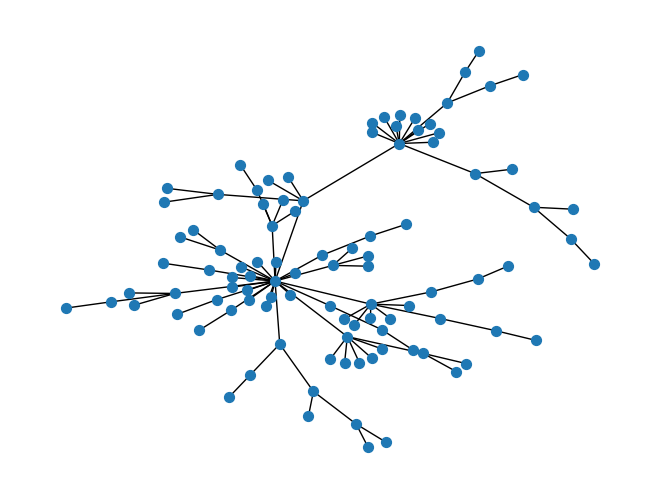

In [24]:
np.random.seed(42)
random.seed(42)

G_BA_1 = nx.Graph()
G_BA_1.add_edges_from([(1,2)])
l = [1,2]
for i in range(3,101):
    j = random.choice(l)
    G_BA_1.add_edge(i,j)
    l.append(i)
    l.append(j)
nx.draw(G_BA_1, node_size=50)

### 5000 node network.

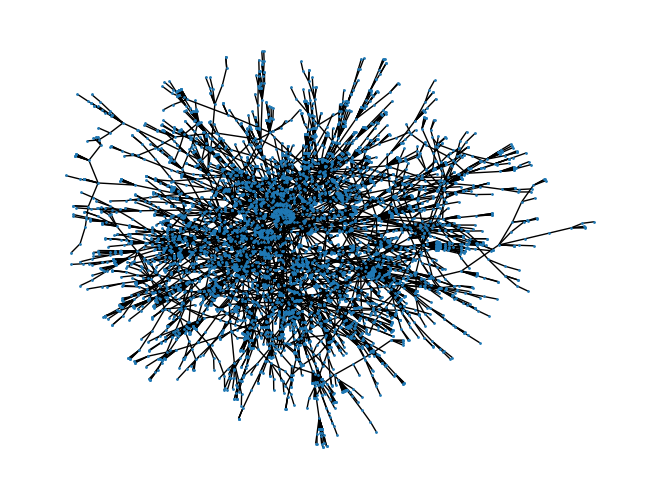

In [25]:
np.random.seed(42)
random.seed(42)

G_BA = nx.Graph()
N = 5000
G_BA.add_edges_from([(1,2)])
l = [1,2]
for i in range(3,N+1):
    j = random.choice(l)
    G_BA.add_edge(i,j)
    l.append(i)
    l.append(j)
nx.draw(G_BA, node_size=1)

#### Maximum and minimum degree?

In [26]:

print(f'Number of nodes: {G_BA.number_of_nodes()}')
print(f'Number of edges: {G_BA.number_of_edges()}')

k = [d for n, d in G_BA.degree()] 
max_k = np.max(k)
min_k = np.min(k)
print(f'Maximum degree: {max_k}')
print(f'Minimum degree: {min_k}')

Number of nodes: 5000
Number of edges: 4999
Maximum degree: 164
Minimum degree: 1


> The maximum degree is 164 and the minimum degree is 1.

#### Bin the degree distribution and plot the distribution. Plot it with both linear and log-log axes.

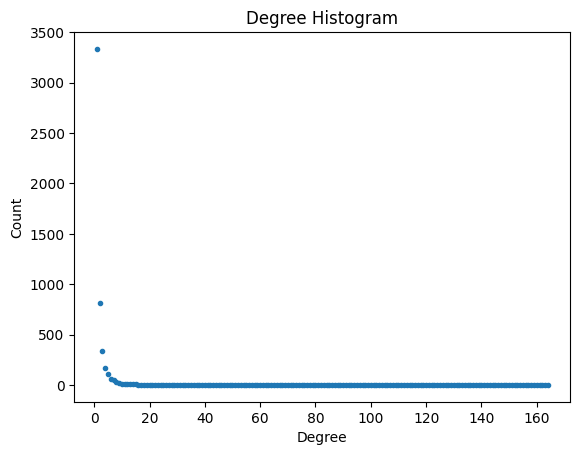

In [27]:
v = np.arange(min_k,max_k+2)

counts, bins = np.histogram(k, bins=v)

plt.plot(bins[:-1], counts, '.')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()


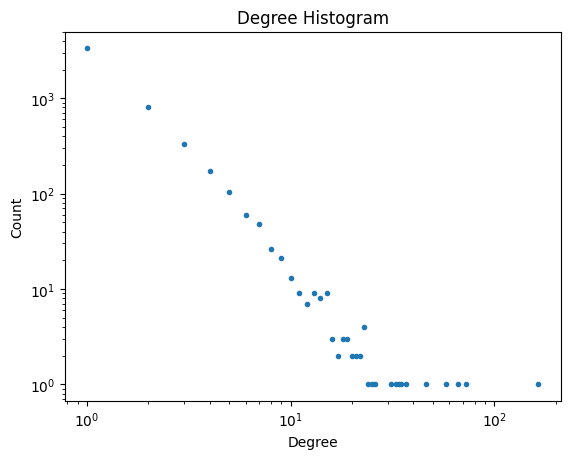

In [28]:
plt.loglog(bins[:-1], counts, '.')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

# Part 5 Power-laws and the friendship paradox

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).
* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.
* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.
* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

* Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

## Answer Part 5

#### Picking a node at random, finding its degree and calculating it's neighbors' average degree

#### Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.

In [29]:
np.random.seed(42)
random.seed(42)

rand_node = random.choice(list(G_BA.nodes()))
print(f'Choosing random node: {rand_node}')
k_rand_node = G_BA.degree(rand_node)
print(f'Degree of random node: {k_rand_node}')
avg_k_neighbors = 0
for node in G_BA.neighbors(rand_node):
    avg_k_neighbors += G_BA.degree(node)
avg_k_neighbors /= G_BA.degree(rand_node)
print(f'Average degree of neighbors: {avg_k_neighbors}')

Choosing random node: 913
Degree of random node: 1
Average degree of neighbors: 2.0


> In this case the friendship paradox is true, since the average degree of the neighbors is higher than the degree of the random chosen node.

#### Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

In [30]:
np.random.seed(42)
random.seed(42)

count = 0
for _ in range(1000):
    rand_node = random.choice(list(G_BA.nodes()))
    k_rand_node = G_BA.degree(rand_node)
    avg_k_neighbors = 0
    for neighbor in G_BA.neighbors(rand_node):
        avg_k_neighbors += G_BA.degree(neighbor)
    avg_k_neighbors /= G_BA.degree(rand_node)
    if avg_k_neighbors > k_rand_node:
        count += 1
print(f'Number of times the friendship paradox is true: {count}')
print(f'Percentage of times the friendship paradox is true: {100*count/1000}%')

Number of times the friendship paradox is true: 859
Percentage of times the friendship paradox is true: 85.9%


> We see that the friendship paradox is true 85.9% of the time.

#### Without preferential attachment

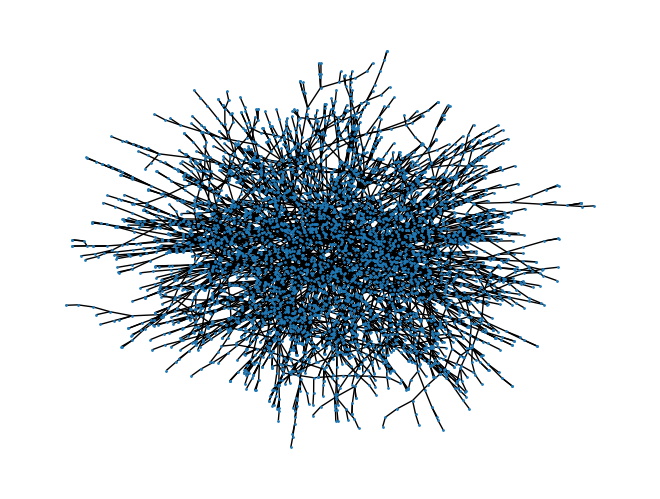

In [31]:
np.random.seed(42)
random.seed(42)
G_no_pref = nx.Graph()
G_no_pref.add_edges_from([(1,2)])
l_no_pref = [1,2]
for i in range(3,N+1):
    j = random.choice(l_no_pref)
    G_no_pref.add_edge(i,j)
    l_no_pref.append(i)
nx.draw(G_no_pref, node_size=1)

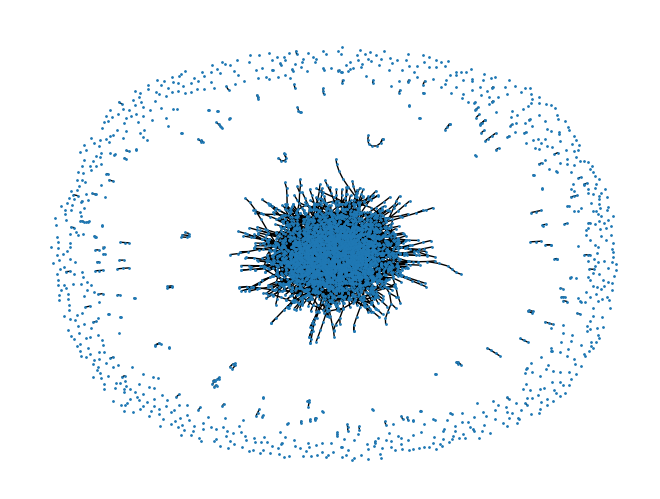

In [32]:
np.random.seed(42)
random.seed(42)
L = G_no_pref.number_of_edges()
avg_k = L*2/N
p = avg_k/(N-1)
G_ER = nx.erdos_renyi_graph(N,p)
nx.draw(G_ER, node_size=1)

> An Erdös-Renyi graph with the same size and attachment probability. 

#### Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words. *Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

No preferential attachment graph
Number of nodes: 5000
Number of edges: 4999
Maximum degree: 12
Minimum degree: 1
Number of connected components: 1


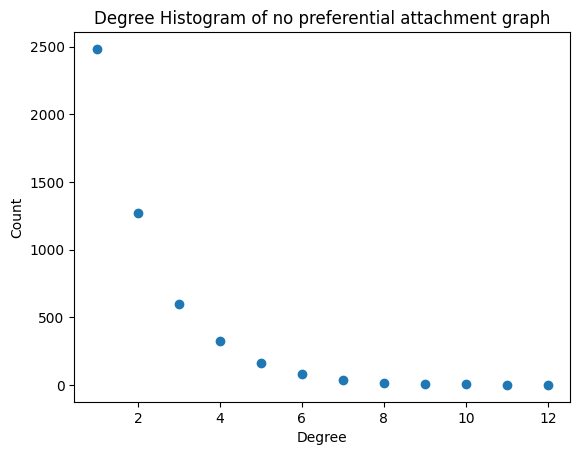

In [33]:
print('No preferential attachment graph')
print(f'Number of nodes: {G_no_pref.number_of_nodes()}')
print(f'Number of edges: {G_no_pref.number_of_edges()}')
k_no_pref = [d for n, d in G_no_pref.degree()] 
max_k_no_pref = np.max(k_no_pref)
min_k_no_pref = np.min(k_no_pref)
print(f'Maximum degree: {max_k_no_pref}')
print(f'Minimum degree: {min_k_no_pref}')

connected_no_pref = list(G_no_pref.subgraph(c) for c in nx.connected_components(G_no_pref))
print(f'Number of connected components: {len(connected_no_pref)}')

v = np.arange(min_k_no_pref,max_k_no_pref+2)

counts, bins = np.histogram(k_no_pref, bins=v)

plt.plot(bins[:-1], counts, 'o')

plt.title("Degree Histogram of no preferential attachment graph")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

Erdos-Renyi graph
Number of nodes: 5000
Number of edges: 4834
Maximum degree: 8
Minimum degree: 0


Number of connected components: 869


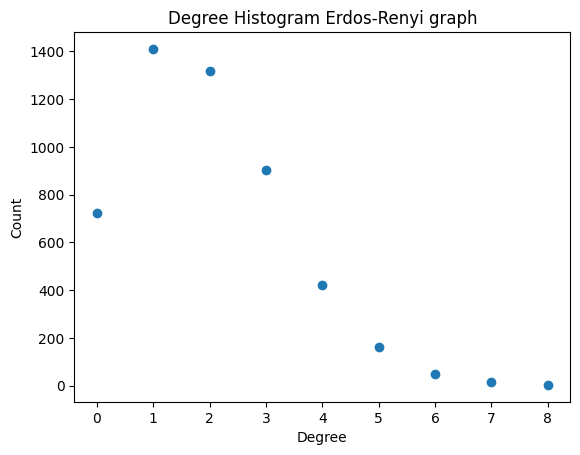

In [34]:
print('Erdos-Renyi graph')
print(f'Number of nodes: {G_ER.number_of_nodes()}')
print(f'Number of edges: {G_ER.number_of_edges()}')
k_ER = [d for n, d in G_ER.degree()] 
max_k_ER = np.max(k_ER)
min_k_ER = np.min(k_ER)
print(f'Maximum degree: {max_k_ER}')
print(f'Minimum degree: {min_k_ER}')

connected_ER = list(G_ER.subgraph(c) for c in nx.connected_components(G_ER))
print(f'Number of connected components: {len(connected_ER)}')


v = np.arange(min_k_ER,max_k_ER+2)

counts, bins = np.histogram(k_ER, bins=v)

plt.plot(bins[:-1], counts, 'o')

plt.title("Degree Histogram Erdos-Renyi graph")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

> The degree distributions look very different. The network with no preferential attachment has one giant component and has an exponential distribution, while the Erdos-Renyi network has many small components and has a binomial distribution.

# Part 6 Configuration-model networks

Next, we will create configuration-model networks with degree distributions of our own choice. Follow the recipe below for success

* Extract the degree sequence for the 100-node Barabasi-Albert network you created in Part 4 above. Create the configuration-model network with an algorithm you have coded on your own and include this algorithm as part of your answer to this exercise (so don't use the built-in NetworkX function, but the one you created during week 3). 
* Plot the network using NetworkX. When you compare this network to your Barabasi-Albert network visually, what differences do you notice?
* Create a 5000-node configuration-model network, where half of the nodes have degree 3 and the other half have degree 5. Again, create the network using the function you coded in Week 3, and not using the NetworkX function.
* What should the sum of node degrees be if all nodes had degrees as described in the exercise?
* Calculate and print the sum of node degrees and plot the binned degree distribution nicely. If the node degrees are not exactly as described in the exercise (half having degree 3, the other half degree 5), explain what might have caused this difference in node degrees.

## Answer Part 6

#### Extract the degree sequence for the 100-node Barabasi-Albert network you created in Part 4 above.

In [35]:
def configuration_model(degrees):
    halfedges = []

    for i, k in enumerate(degrees):
        for j in range(k):
            halfedges.append(i)

    random.shuffle(halfedges)

    edgelist = []
    for i in range(0, len(halfedges), 2):
        edgelist.append((halfedges[i], halfedges[i+1]))

    return edgelist 

#### Plot the network using NetworkX.

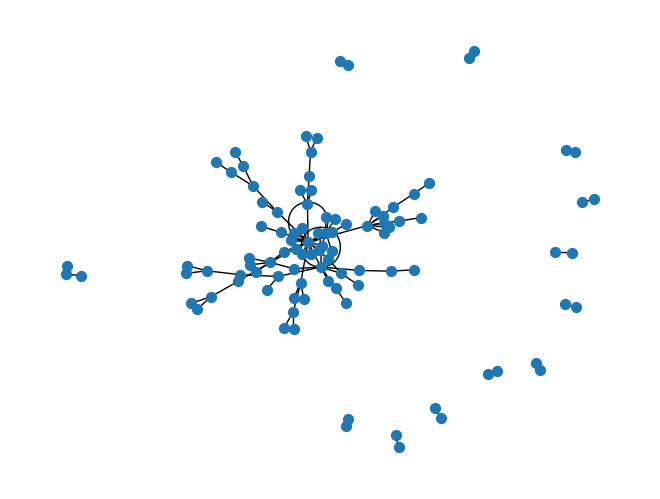

In [36]:
np.random.seed(42)
random.seed(42)
degrees_BA_1 = [d for n, d in G_BA_1.degree()]
edgelist = configuration_model(degrees_BA_1)
G_conf = nx.Graph()
G_conf.add_edges_from(edgelist)
nx.draw(G_conf, node_size=50)

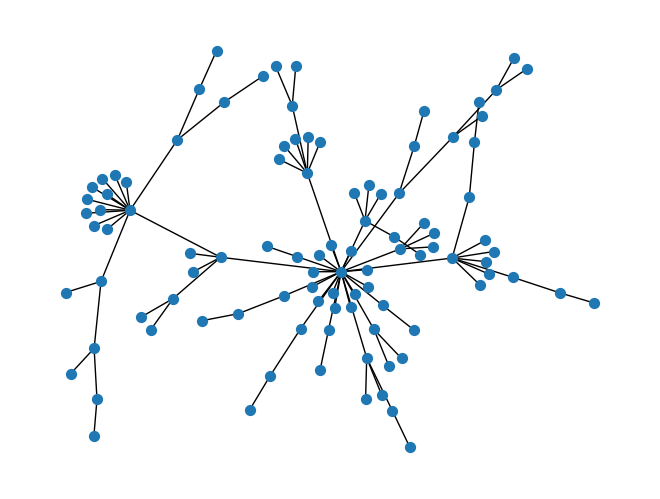

In [37]:
nx.draw(G_BA_1, node_size=50)

#### When you compare this network to your Barabasi-Albert network visually, what differences do you notice?

> The Barabasi-Albert network is one giant connected component, while the configuration model network has one giant and many small components. Also the configuration model network has self loops.

#### Create a 5000-node configuration-model network, where half of the nodes have degree 3 and the other half have degree 5.

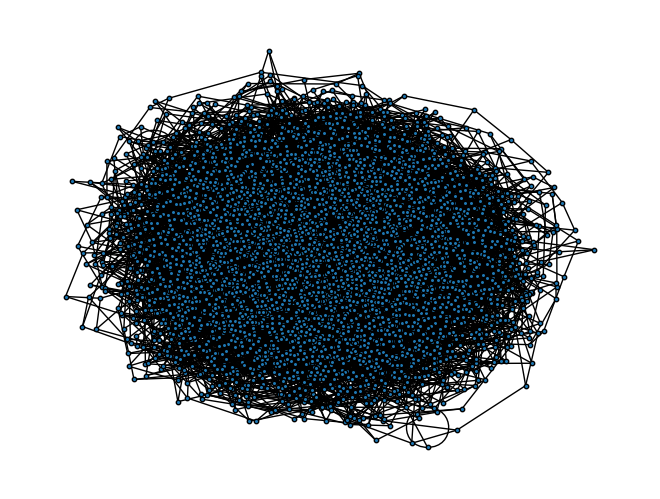

In [38]:
np.random.seed(42)
random.seed(42)

degrees = [3]*2500 + [5]*2500
edgelist = configuration_model(degrees)
G_conf = nx.Graph()
G_conf.add_edges_from(edgelist)
nx.draw(G_conf, node_size=10, edge_color='#000000',edgecolors='#000000')

#### What should the sum of node degrees be if all nodes had degrees as described in the exercise?

In [39]:
degrees_true = [d for n, d in G_conf.degree()]
print(f'Sum of degrees: {np.sum(degrees)}')
print(f'Sum of true degrees: {np.sum(degrees_true)}')

Sum of degrees: 20000
Sum of true degrees: 19996


> So the sum of node degrees should be 20000 but it is actually 19996

#### Calculate and print the sum of node degrees and plot the binned degree distribution nicely. If the node degrees are not exactly as described in the exercise (half having degree 3, the other half degree 5), explain what might have caused this difference in node degrees.

Minimum degree: 2
Maximum degree: 5
Bin 2: 2
Bin 3: 2498
Bin 4: 2
Bin 5: 2498


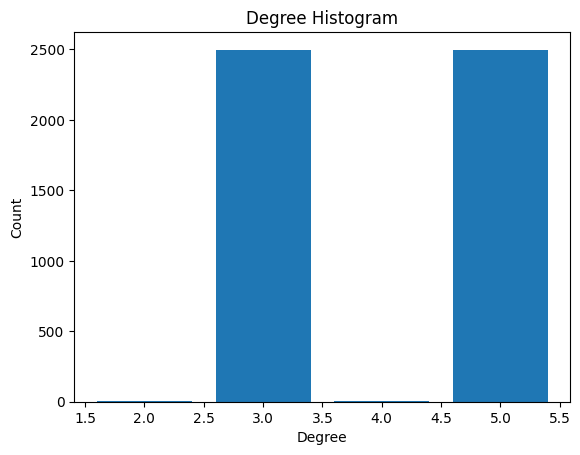

In [40]:
k = [d for n, d in G_conf.degree()] 
max_k = np.max(k)
min_k = np.min(k)
print(f'Minimum degree: {min_k}')
print(f'Maximum degree: {max_k}')

v = np.arange(min_k,max_k+2)

counts, bins = np.histogram(k, bins=v)

for i in range(len(counts)):
    print(f'Bin {bins[i]}: {counts[i]}')

plt.bar(bins[:-1], counts)

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

> The graph is supose to have 20000 edges but only has 19996 edges and we see that there are tow nodes with degree 2 and two nodes with degree 4, this is because of the way the configuration model network is constructed and it can have multiple edges between two nodes and these are only counted once.